In [30]:
import cv2
from PIL import Image

In [31]:
face = 'cascade/haarcascade_frontalface_default.xml'
eyes = 'cascade/haarcascade_eye.xml'

In [34]:
def detection(image_path, face_cascade, eyes_cascade, ):
    # read in the image and convert to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # normalize the brightness and increase the contrast of the image
    gray = cv2.equalizeHist(gray)
    # face detection
    face_detect = cv2.CascadeClassifier(face_cascade)
    # eyes detection
    eyes_detect = cv2.CascadeClassifier(eyes_cascade)
    
    faces = face_detect.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5, minSize=(30,30), 
                                         flags=cv2.CASCADE_SCALE_IMAGE)
    # create a copy of the original frame
    clone = image.copy()
    # loop over the faces
    for face in faces:
        (x,y,w,h) = face
        face_center = (x + w//2, y + h//2)
        cv2.ellipse(clone, face_center, (w//2,h//2), 0, 0, 360, (255,0,0), 2, cv2.LINE_AA)
    
        # crop the face from the frame
        ROI = gray[y:y+h, x:x+w]
        # find the eyes in the face
        eyes = eyes_detect.detectMultiScale(ROI)
        # loop over each eye
        for eye in eyes:
            (x1,y1,w1,h1) = eye
            eye_center = (x+x1+w1//2, y+y1+h1//2)
            cv2.ellipse(clone, eye_center, (w1//2, h1//2), 0, 0, 360, (0,255,0), 2, cv2.LINE_AA)
            
    #cv2.imshow("Face and eyes detection", clone)
    display = cv2.cvtColor(clone, cv2.COLOR_BGR2RGB)
    return Image.fromarray(display)


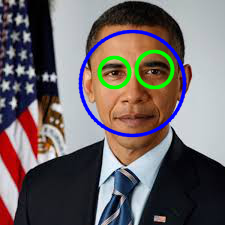

In [35]:
detection("obama.jfif", face, eyes)